<a href="https://colab.research.google.com/github/Thakurkorea/Camera_obj_distance/blob/main/deep_learning_occupancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate synthetic data for demonstration purposes
np.random.seed(42)
num_samples = 1000

# Features: temperature, humidity
X = np.random.rand(num_samples, 2)
# Labels: binary occupancy status (0 or 1)
y = np.random.randint(2, size=num_samples)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the occupancy prediction model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Make predictions on new data
new_data = np.array([[0.8, 0.2]])  # Replace with your own input features
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)[0, 0]
predicted_occupancy = 1 if prediction > 0.5 else 0
print(f'Predicted Occupancy: {predicted_occupancy}, Confidence: {prediction:.4f}')


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset
np.random.seed(42)
data_size = 1000

# Features
temperature = np.random.normal(22, 2, data_size)
humidity = np.random.normal(50, 5, data_size)

# Target (occupancy, binary: 0 or 1)
occupancy = ((temperature - 20) * 0.5 + (humidity - 45) * 0.2 + np.random.normal(0, 1, data_size)) > 0.0

# Create a DataFrame
df = pd.DataFrame({'Temperature': temperature, 'Humidity': humidity, 'Occupancy': occupancy})

# Split the data into features and target
X = df[['Temperature', 'Humidity']].values
y = df['Occupancy'].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Get weights and biases for each layer
for i, layer in enumerate(model.layers):
    weights, biases = layer.get_weights()
    print(f"Layer {i + 1} - Weights: {weights}, Biases: {biases}")


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset
np.random.seed(42)
data_size = 1000

# Features
temperature = np.random.normal(22, 2, data_size)
humidity = np.random.normal(50, 5, data_size)

# Targets (occupancy, binary: 0 or 1, and detection probability)
occupancy = ((temperature - 20) * 0.5 + (humidity - 45) * 0.2 + np.random.normal(0, 1, data_size)) > 0.0
detection_probability = 1 / (1 + np.exp(-(temperature - 25) + np.random.normal(0, 0.5, data_size)))

# Create a DataFrame
df = pd.DataFrame({'Temperature': temperature, 'Humidity': humidity, 'Occupancy': occupancy, 'Detection_Prob': detection_probability})

# Split the data into features and targets
X = df[['Temperature', 'Humidity']].values
y_occupancy = df['Occupancy'].values
y_detection_prob = df['Detection_Prob'].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_occupancy_train, y_occupancy_test, y_detection_prob_train, y_detection_prob_test = \
    train_test_split(X, y_occupancy, y_detection_prob, test_size=0.2, random_state=42)

# Build the neural network model
inputs = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(32, activation='relu')(x)

# Output for occupancy (sigmoid activation for binary classification)
occupancy_output = tf.keras.layers.Dense(1, activation='sigmoid', name='occupancy')(x)

# Output for detection probability (linear activation for regression)
detection_prob_output = tf.keras.layers.Dense(1, activation='linear', name='detection_prob')(x)

# Create a model with multiple outputs
model = tf.keras.Model(inputs=inputs, outputs=[occupancy_output, detection_prob_output])

# Compile the model
model.compile(optimizer='adam',
              loss={'occupancy': 'binary_crossentropy', 'detection_prob': 'mse'},
              metrics={'occupancy': 'accuracy', 'detection_prob': 'mae'})

# Train the model
model.fit(X_train, {'occupancy': y_occupancy_train, 'detection_prob': y_detection_prob_train},
          epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
results = model.evaluate(X_test, {'occupancy': y_occupancy_test, 'detection_prob': y_detection_prob_test})
print("Test Loss - Occupancy:", results[1])
print("Test Loss - Detection Probability:", results[2])


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset
np.random.seed(42)
data_size = 1000

# Features
temperature = np.random.normal(22, 2, data_size)
humidity = np.random.normal(50, 5, data_size)

# Targets (occupancy, binary: 0 or 1, and detection probability)
occupancy = ((temperature - 20) * 0.5 + (humidity - 45) * 0.2 + np.random.normal(0, 1, data_size)) > 0.0
detection_probability = 1 / (1 + np.exp(-(temperature - 25) + np.random.normal(0, 0.5, data_size)))

# Create a DataFrame
df = pd.DataFrame({'Temperature': temperature, 'Humidity': humidity, 'Occupancy': occupancy, 'Detection_Prob': detection_probability})

# Split the data into features and targets
X = df[['Temperature', 'Humidity']].values
y_occupancy = df['Occupancy'].values
y_detection_prob = df['Detection_Prob'].values

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_occupancy_train, y_occupancy_test, y_detection_prob_train, y_detection_prob_test = \
    train_test_split(X, y_occupancy, y_detection_prob, test_size=0.2, random_state=42)

# Build the neural network model
inputs = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(32, activation='relu')(x)

# Output for occupancy (sigmoid activation for binary classification)
occupancy_output = tf.keras.layers.Dense(1, activation='sigmoid', name='occupancy')(x)

# Output for detection probability (linear activation for regression)
detection_prob_output = tf.keras.layers.Dense(1, activation='linear', name='detection_prob')(x)

# Create a model with multiple outputs
model = tf.keras.Model(inputs=inputs, outputs=[occupancy_output, detection_prob_output])

# Compile the model
model.compile(optimizer='adam',
              loss={'occupancy': 'binary_crossentropy', 'detection_prob': 'mse'},
              metrics={'occupancy': 'accuracy', 'detection_prob': 'mae'})

# Train the model
model.fit(X_train, {'occupancy': y_occupancy_train, 'detection_prob': y_detection_prob_train},
          epochs=10, batch_size=32, validation_split=0.2)

# Print weights for each layer
for layer in model.layers:
    if layer.get_weights():
        weights, biases = layer.get_weights()
        print(f"Layer Weights: {weights}, Biases: {biases}")



4/4 [==============================] - 0s 5ms/step


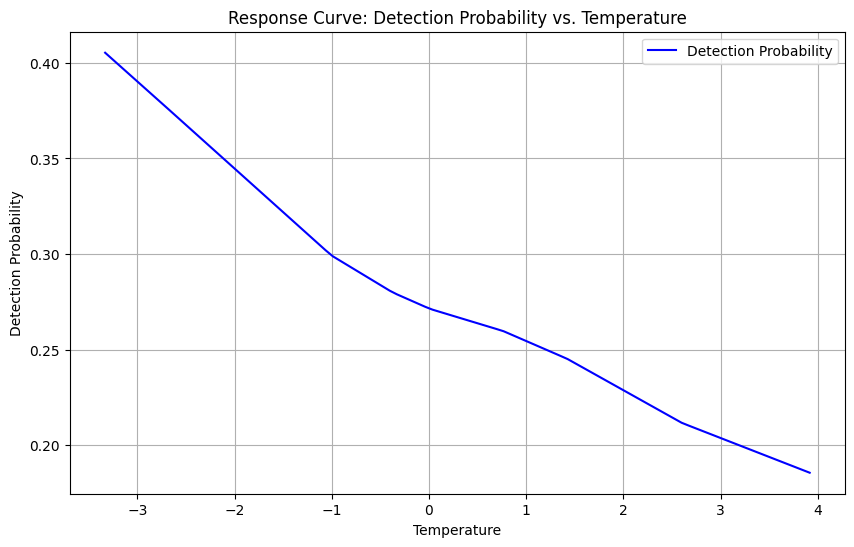

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of temperatures for plotting
temperature_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
constant_humidity = np.mean(X[:, 1])  # Use the mean humidity as constant

# Create input data for the model
input_data = np.column_stack((temperature_range, np.full_like(temperature_range, constant_humidity)))

# Normalize the input data using the same scaler used for training
input_data_normalized = scaler.transform(input_data)

# Predict occupancy and detection probability
_, detection_probabilities = model.predict(input_data_normalized)

# Plot the response curve
plt.figure(figsize=(10, 6))

# Plot Detection Probability
plt.plot(temperature_range, detection_probabilities, label='Detection Probability', color='blue')

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Detection Probability')
plt.title('Response Curve: Detection Probability vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()


7/7 [==============================] - 0s 3ms/step


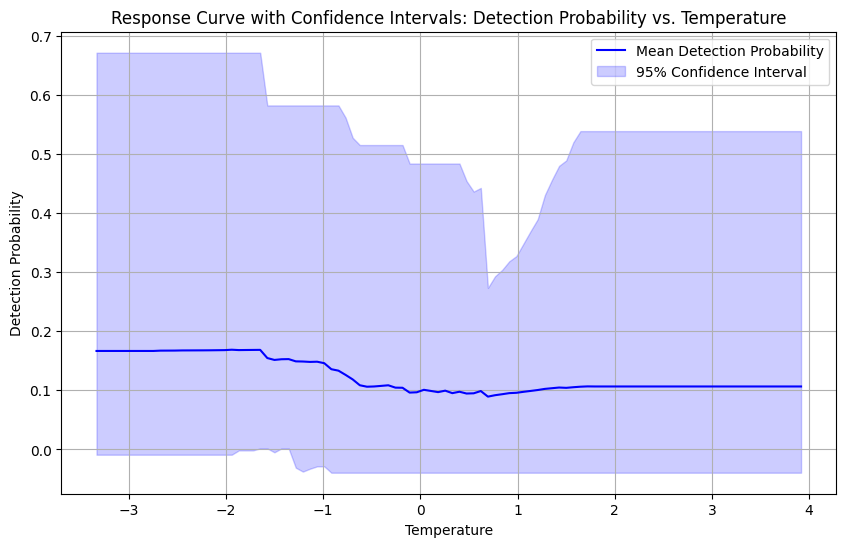

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Number of bootstrap samples
num_samples = 100

# Initialize arrays to store bootstrap results
bootstrap_detection_probabilities = np.zeros((num_samples, len(temperature_range)))

# Bootstrap resampling and prediction
for i in range(num_samples):
    # Bootstrap resampling
    X_boot, _ = resample(X_test, y_detection_prob_test, random_state=i)

    # Predict occupancy and detection probability
    _, detection_probabilities_boot = model.predict(X_boot)

    # Interpolate the results to match the length of temperature_range
    bootstrap_detection_probabilities[i, :] = np.interp(temperature_range, X_boot[:, 0], detection_probabilities_boot.flatten())

# Calculate mean and confidence intervals
mean_detection_probabilities = np.mean(bootstrap_detection_probabilities, axis=0)
lower_ci = np.percentile(bootstrap_detection_probabilities, 2.5, axis=0)
upper_ci = np.percentile(bootstrap_detection_probabilities, 97.5, axis=0)

# Plot the response curve with confidence intervals
plt.figure(figsize=(10, 6))

# Plot Detection Probability
plt.plot(temperature_range, mean_detection_probabilities, label='Mean Detection Probability', color='blue')
plt.fill_between(temperature_range, lower_ci, upper_ci, color='blue', alpha=0.2, label='95% Confidence Interval')

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Detection Probability')
plt.title('Response Curve with Confidence Intervals: Detection Probability vs. Temperature')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score

# Generate synthetic data
np.random.seed(42)
data_size = 1000

# Features
temperature = np.random.normal(22, 2, data_size)
humidity = np.random.normal(50, 5, data_size)

# Targets (occupancy, binary: 0 or 1, and continuous detection probability)
occupancy = ((temperature - 20) * 0.5 + (humidity - 45) * 0.2 + np.random.normal(0, 1, data_size)) > 0.0
detection_probability = 1 / (1 + np.exp(-(temperature - 25) + np.random.normal(0, 0.5, data_size)))

# Create a DataFrame
df = pd.DataFrame({'Temperature': temperature, 'Humidity': humidity, 'Occupancy': occupancy, 'Detection_Prob': detection_probability})

# Split the data into features and targets
X = df[['Temperature', 'Humidity']].values
y_occupancy = df['Occupancy'].values
y_detection_prob = df['Detection_Prob'].values

# Split the data into training and testing sets
X_train, X_test, y_occupancy_train, y_occupancy_test, y_detection_prob_train, y_detection_prob_test = \
    train_test_split(X, y_occupancy, y_detection_prob, test_size=0.2, random_state=42)

# Train a logistic regression model for occupancy
occupancy_model = LogisticRegression()
occupancy_model.fit(X_train, y_occupancy_train)

# Predict occupancy probabilities on the test set
occupancy_probabilities = occupancy_model.predict_proba(X_test)[:, 1]

# Train a linear regression model for detection probability
detection_prob_model = LinearRegression()
detection_prob_model.fit(X_train, y_detection_prob_train)

# Predict detection probabilities on the test set
detection_probabilities = detection_prob_model.predict(X_test)

# Print some results
print("Occupancy Probabilities:", occupancy_probabilities[:10])
print("Detection Probabilities:", detection_probabilities[:10])


Occupancy Probabilities: [0.99652787 0.9739052  0.52009589 0.99238973 0.9269831  0.99917661
 0.74209393 0.22391197 0.99487678 0.98612861]
Detection Probabilities: [ 0.22568587  0.29321705 -0.17789031  0.04067396 -0.05490645  0.29325961
 -0.03605907 -0.0277226   0.23951046  0.00493785]


In [ ]:
from sklearn.metrics import accuracy_score

# Predict occupancy labels using the logistic regression model
predicted_occupancy_labels = occupancy_model.predict(X_test)

# Convert predicted detection probabilities to binary labels
predicted_detection_labels = (detection_probabilities > 0.5).astype(int)

# Calculate accuracy for occupancy prediction
occupancy_accuracy = accuracy_score(y_occupancy_test, predicted_occupancy_labels)

# Calculate accuracy for detection probability prediction
detection_accuracy = accuracy_score(y_occupancy_test, predicted_detection_labels)

print("Occupancy Accuracy:", occupancy_accuracy)
print("Detection Accuracy:", detection_accuracy)


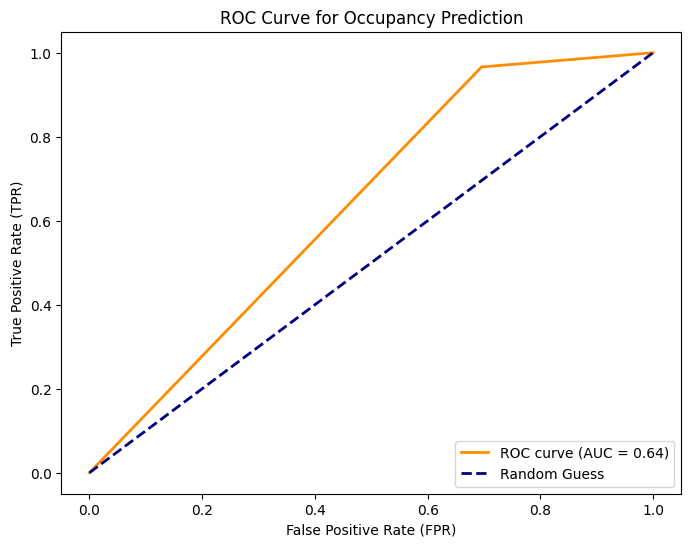

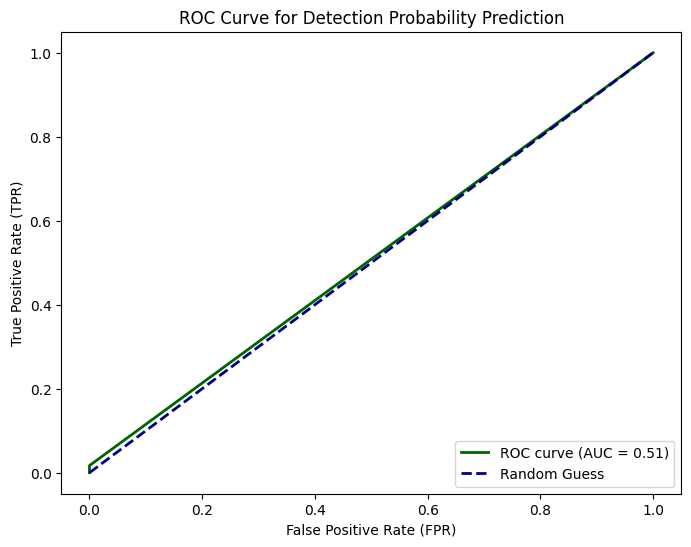

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve for occupancy prediction
fpr_occupancy, tpr_occupancy, _ = roc_curve(y_occupancy_test, predicted_occupancy_labels)

# Calculate ROC curve for detection probability prediction
fpr_detection, tpr_detection, _ = roc_curve(y_occupancy_test, predicted_detection_labels)

# Calculate AUC (Area Under the Curve) for occupancy and detection probability
auc_occupancy = auc(fpr_occupancy, tpr_occupancy)
auc_detection = auc(fpr_detection, tpr_detection)

# Plot ROC curve for occupancy prediction
plt.figure(figsize=(8, 6))
plt.plot(fpr_occupancy, tpr_occupancy, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_occupancy:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Occupancy Prediction')
plt.legend(loc='lower right')
plt.show()

# Plot ROC curve for detection probability prediction
plt.figure(figsize=(8, 6))
plt.plot(fpr_detection, tpr_detection, color='darkgreen', lw=2, label=f'ROC curve (AUC = {auc_detection:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Detection Probability Prediction')
plt.legend(loc='lower right')
plt.show()
